In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import os

In [2]:
#Source - https://covidtracking.com/data

#Get Covid data for all of U.S.
json_url = "https://api.covidtracking.com/v1/states/daily.json"

#Create dictionary to read from
us_daily_dict = requests.get(json_url).json()

In [3]:
#Create data frame from dictionary
us_daily = pd.DataFrame(us_daily_dict)
us_daily.head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200829,AK,6035.0,339660.0,NaN,43.0,NaN,NaN,NaN,7.0,...,345695,0,0,d14280fc719ed7f9365e0e046b0ac9ffd9a0b06b,0,0,0,0,0,
1,20200829,AL,123889.0,851929.0,NaN,986.0,14267.0,NaN,1459.0,NaN,...,975818,45,0,668b17e7da32941aa4a95ef2775527e9e7d5d7a7,0,0,0,0,0,
2,20200829,AR,60378.0,646592.0,NaN,407.0,4142.0,NaN,NaN,95.0,...,706970,16,0,19baf0f83cf44094d1194521bfebecbcdeaf6961,0,0,0,0,0,
3,20200829,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,e063eb477b842be4d1532f74fc5371dd23ec577d,0,0,0,0,0,
4,20200829,AZ,201287.0,991089.0,NaN,812.0,21433.0,262.0,NaN,164.0,...,1192376,29,5,d6aca9f355470d3f2ed666030c62bc76e880d557,0,0,0,0,0,


In [4]:
#Filter Kansas and New Jersey
ks_nj_daily = pd.DataFrame(us_daily[["date", "state", "positive", "negative", "positiveIncrease", "negativeIncrease", "death", "deathIncrease", 
                  "totalTestResultsIncrease", "totalTestResults", "recovered"]])
ks_nj_daily = ks_nj_daily.loc[(ks_nj_daily["state"] == "KS") | (ks_nj_daily["state"] == "NJ") ]

In [5]:
#Fill percentage column
ks_nj_daily["Percentage"] = ks_nj_daily["positiveIncrease"]/ks_nj_daily["totalTestResultsIncrease"]

#Fill NaN fields to be zero for readability
ks_nj_daily[["Percentage", "death", "recovered", "positive", "negative"]] = ks_nj_daily[["Percentage", "death", "recovered", "positive", "negative"]].fillna(0)

#Add active cases column
ks_nj_daily["Active Cases"] = ""

#Fill active cases column
for row in ks_nj_daily.iterrows():
    ks_nj_daily["Active Cases"] = ks_nj_daily["positive"] - ks_nj_daily["recovered"]

#Format percentage
ks_nj_daily["Percentage"] = ks_nj_daily["Percentage"].astype(float).map("{:.2%}".format)
#ks_nj_daily = ks_nj_daily.set_index("date")

#Write to csv file
ks_nj_daily.to_csv('Resources/ks_nj_daily.csv')

In [6]:
#Filter for March data
ks_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200301) & (ks_nj_daily["date"] <= 20200331) & (ks_nj_daily["state"] == "KS") ,:]
nj_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200301) & (ks_nj_daily["date"] <= 20200331) & (ks_nj_daily["state"] == "NJ") ,:]
nj_march = nj_march.loc[(nj_march["positive"] > 0),:]

#Filter April data
ks_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200401) & (ks_nj_daily["date"] <= 20200430) & (ks_nj_daily["state"] == "KS") ,:]
nj_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200401) & (ks_nj_daily["date"] <= 20200430) & (ks_nj_daily["state"] == "NJ"),:]

#Filter May data
ks_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200501) & (ks_nj_daily["date"] <= 20200531) & (ks_nj_daily["state"] == "KS") ,:]
nj_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200501) & (ks_nj_daily["date"] <= 20200531) & (ks_nj_daily["state"] == "NJ"),:]

#Filter June data
ks_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200601) & (ks_nj_daily["date"] <= 20200630) & (ks_nj_daily["state"] == "KS") ,:]
nj_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200601) & (ks_nj_daily["date"] <= 20200630) & (ks_nj_daily["state"] == "NJ"),:]

#Filter July data
ks_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200701) & (ks_nj_daily["date"] <= 20200731) & (ks_nj_daily["state"] == "KS") ,:]
nj_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200701) & (ks_nj_daily["date"] <= 20200731) & (ks_nj_daily["state"] == "NJ"),:]

#Filter August data
ks_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200801) & (ks_nj_daily["date"] <= 20200831) & (ks_nj_daily["state"] == "KS") ,:]
nj_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200801) & (ks_nj_daily["date"] <= 20200831) & (ks_nj_daily["state"] == "NJ"),:]


In [7]:
#Get active cases for each month in Kansas
tot_ks_march = ks_march["Active Cases"].max()
tot_ks_april = ks_april["Active Cases"].max()
tot_ks_may = ks_may["Active Cases"].max()
tot_ks_june = ks_june["Active Cases"].max()
tot_ks_july = ks_july["Active Cases"].max()
tot_ks_aug = ks_aug["Active Cases"].max()

ks_cases_by_month = pd.DataFrame({"March":[tot_ks_march], "April":[tot_ks_april], "May":[tot_ks_may], "June":[tot_ks_june],
                                 "July":[tot_ks_july], "August":[tot_ks_aug]})
ks_cases_by_month_final = ks_cases_by_month.transpose()
ks_cases_by_month_final.reset_index(inplace=True)
ks_cases_by_month_final.columns = ["Month", "Kansas"]
ks_cases_by_month_final

,Month,Kansas
0,March,428.0
1,April,3966.0
2,May,9172.0
3,June,13649.0
4,July,26634.0
5,August,39390.0


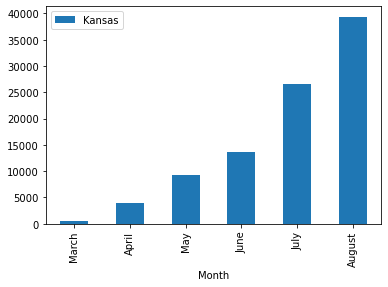

In [8]:
#Plot Monthly data for Kansas
ks_cases_by_month_final.plot(kind = "bar", x = "Month", y = "Kansas")
plt.savefig("Images/ks_monthly_graph.png")
plt.show()

In [9]:
#Get active cases for each month in New Jersey
tot_nj_march = nj_march["Active Cases"].max()
tot_nj_april = nj_april["Active Cases"].max()
tot_nj_may = nj_may["Active Cases"].max()
tot_nj_june = nj_june["Active Cases"].max()
tot_nj_july = nj_july["Active Cases"].max()
tot_nj_aug = nj_aug["Active Cases"].max()

nj_cases_by_month = pd.DataFrame({"March":[tot_nj_march], "April":[tot_nj_april], "May":[tot_nj_may], "June":[tot_nj_june],
                                 "July":[tot_nj_july], "August":[tot_nj_aug]})
nj_cases_by_month_final = nj_cases_by_month.transpose()
nj_cases_by_month_final.reset_index(inplace=True)
nj_cases_by_month_final.columns = ["Month", "New Jersey"]
nj_cases_by_month_final

,Month,New Jersey
0,March,18696.0
1,April,111188.0
2,May,133885.0
3,June,141454.0
4,July,149185.0
5,August,157493.0


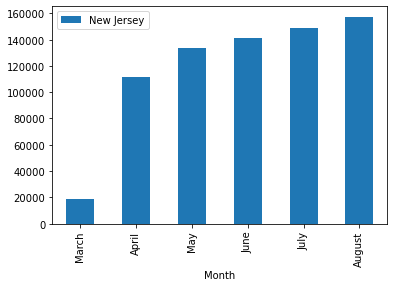

In [10]:
#Plot Monthly data for New Jersey
nj_cases_by_month_final.plot(kind = "bar", x = "Month", y = "New Jersey")
plt.savefig("Images/nj_monthly_graph.png")
plt.show()